

<h1 style='background-color:Green; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;' > Chest Cancer Classification - VVG16 </h1>

### Symptoms and Diagnosis

Because chest cancer encompasses a number of different cancers, symptoms will be different for different people. Common symptoms of chest cancer include:

* Chest pain
* Cough that brings up blood or hemoptysis
* Painful coughing or a cough that doesn’t go away
* Shortness of breath
* Hoarseness
* Wheezing
* Unusual lumps of tissue under the skin on the chest
* Unexplained weight loss 

<img src="https://cdn.images.express.co.uk/img/dynamic/11/750x445/1321321.jpg" width="800px">


<h1 style='background-color:Green; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;' >  What is the VGG16 </h1>



VGG16 is a convolutional neural network model proposed by K. ... Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.





<img src="https://miro.medium.com/max/850/1*_Lg1i7wv1pLpzp2F4MLrvw.png" width="800px">

### Description

#### Data

Images are not in dcm format, the images are in jpg or png to fit the model
Data contain 3 chest cancer types which are Adenocarcinoma,Large cell carcinoma, Squamous cell carcinoma , and 1 folder for the normal cell
Data folder is the main folder that contain all the step folders
inside Data folder are test , train , valid

test represent testing set

train represent training set

valid represent validation set

training set is 70%

testing set is 20%

validation set is 10%


* Adenocarcinoma

Adenocarcinoma of the lung: Lung adenocarcinoma is the most common form of lung cancer accounting for 30 percent of all cases overall and about 40 percent of all non-small cell lung cancer occurrences. Adenocarcinomas are found in several common cancers, including breast, prostate and colorectal.

Adenocarcinomas of the lung are found in the outer region of the lung
in glands that secrete mucus and help us breathe.
Symptoms include coughing, hoarseness, weight loss and weakness.

* Large cell carcinoma

Large-cell undifferentiated carcinoma: Large-cell undifferentiated carcinoma lung cancer grows and spreads quickly and can
be found anywhere in the lung. This type of lung cancer usually accounts for 10
to 15 percent of all cases of NSCLC.
Large-cell undifferentiated carcinoma tends to grow and spread quickly.

* Squamous cell carcinoma

Squamous cell: This type of lung cancer is found centrally in the lung,
where the larger bronchi join the trachea to the lung,
or in one of the main airway branches.
Squamous cell lung cancer is responsible for about 30 percent of all non-small
cell lung cancers, and is generally linked to smoking.

And the last folder is the normal CT-Scan images



#### Dataset link :

[Here](https://www.kaggle.com/mohamedhanyyy/chest-ctscan-images)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize

# پایینی رو که در کد هست رو خودم بستم
#from skimage.color import grey2rgb

#   بجاش دستور زیر را از اینترنت   اضافه کردم که به کمک خطایی که داده بود خودش هم یه سایت معرفی کرد
!apt-get -qq install -y graphviz && pip install pydot
import pydot



import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam

from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
#from typeguard import typechecked
from typing import Optional

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [6]:
from google.colab import drive
drive.mount('/content/drive')



train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/workshop_cancer/Dataset/Data/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

Mounted at /content/drive
Found 613 images belonging to 4 classes.


In [7]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/workshop_cancer/Dataset/Data/valid',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 72 images belonging to 4 classes.


In [8]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/workshop_cancer/Dataset/Data/test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 315 images belonging to 4 classes.


In [9]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

58889256/58889256 [==============================] - 4s 0us/step


In [10]:
# Freezing Layers

for layer in base_model.layers[:-8]:
    layer.trainable=False

In [11]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4,activation='softmax'))

In [12]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

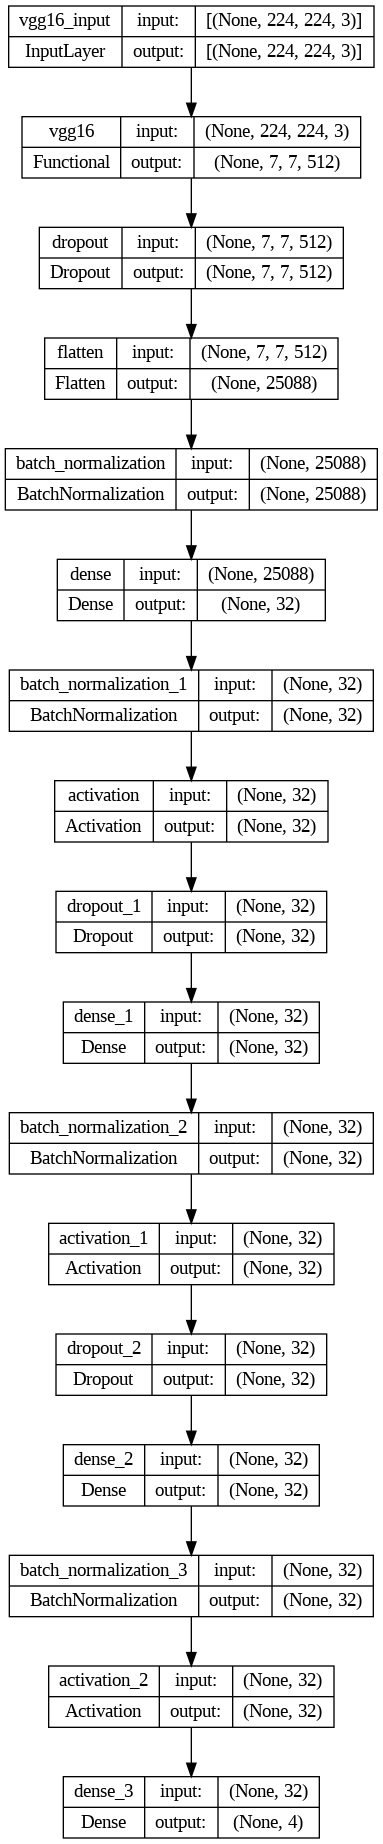

In [13]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [14]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [16]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=3)

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [18]:
%time
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 10,verbose = 1,callbacks=[lrd,mcp,es])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs
Epoch 1/10
10/10 [==============================] - 470s 45s/step - loss: 1.7569 - accuracy: 0.6970 - precision: 0.2018 - recall: 0.0718 - auc: 0.4697 - f1_score: 0.1084 - val_loss: 124.9406 - val_accuracy: 0.6042 - val_precision: 0.2083 - val_recall: 0.2083 - val_auc: 0.4722 - val_f1_score: 0.2812 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 1.5987 - accuracy: 0.7129 - precision: 0.2844 - recall: 0.0979 - auc: 0.5289 - f1_score: 0.1424 - val_loss: 62.3960 - val_accuracy: 0.5694 - val_precision: 0.1389 - val_recall: 0.1389 - val_auc: 0.4115 - val_f1_score: 0.0781 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 1.4918 - accuracy: 0.7247 - precision: 0.3176 - recall: 0.0881 - auc: 0.5598 - f1_score: 0.1380 - val_loss: 39.9081 - val_accuracy: 0.5903 - val_precision: 0.1806 - val_recall: 0.1806 - val_auc: 0.4522 - val_f1_score: 0.1562 - lr: 0.0010
Epo

In [19]:
model.evaluate(test_dataset, verbose=1)

5/5 [==============================] - 181s 45s/step - loss: 177.0720 - accuracy: 0.5857 - precision: 0.1714 - recall: 0.1714 - auc: 0.4476 - f1_score: 0.1706


[177.07199096679688,
 0.5857142806053162,
 0.17142857611179352,
 0.17142857611179352,
 0.4476190209388733,
 0.17060376703739166]

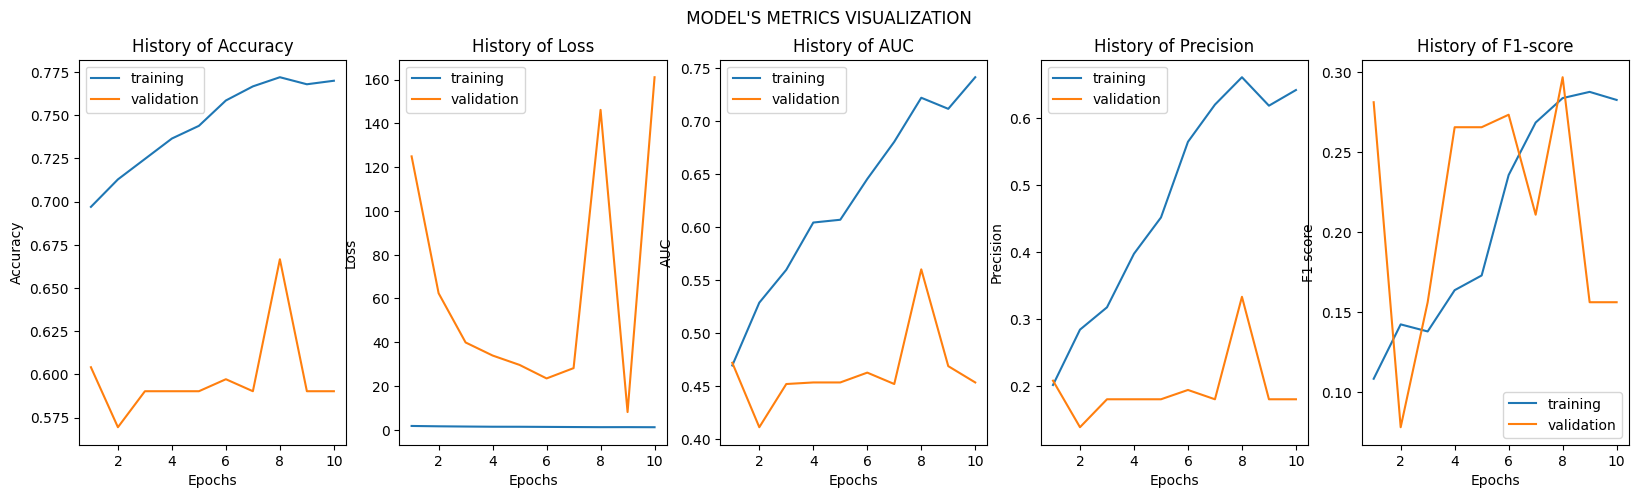

In [20]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )